In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [ ]:
#Loading the dataset
from google.colab import files
files.upload()

Saving ETH.csv to ETH (6).csv


{'ETH.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984\n2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984\n2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992\n2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936\n2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984\n2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000\n2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984\n2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016\n2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992\n2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,649638976\n2017-11-19,347.401001,371.290985,344.739990,354.385986,354.385986,1181529984\n2017-11-20,354.093994,372.136993,353.289001,366.730011,366.730011,807027008\n2017-11-21,367.

In [ ]:
#Reading the data
#df = pd.read_csv('BNB-USD.csv')
df = pd.read_csv('ETH.csv')


#Showing the data
df



,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1560,2022-02-16,3180.446777,3181.616943,3055.168213,3127.830078,3127.830078,12352406833
1561,2022-02-17,3126.858398,3154.615234,2861.852051,2881.481934,2881.481934,15860206214
1562,2022-02-18,2884.340576,2937.308594,2761.643311,2785.727539,2785.727539,15748173433
1563,2022-02-19,2784.872803,2826.347900,2707.378418,2763.701172,2763.701172,9774183169


In [ ]:
df.dropna(inplace=True)
rows_with_NaN = df[df.isnull().any(axis=1)]
rows_with_NaN

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
#Create a variable for prediction 'n' days out into the future
projection = 5
#Create a new column called prediction
df['Prediction'] = df[['Close']].shift(-projection)

#Show the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,337.631012
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,333.356995
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,330.924011
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,332.394012
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,347.612000
...,...,...,...,...,...,...,...,...
1560,2022-02-16,3180.446777,3181.616943,3055.168213,3127.830078,3127.830078,12352406833,NaN
1561,2022-02-17,3126.858398,3154.615234,2861.852051,2881.481934,2881.481934,15860206214,NaN
1562,2022-02-18,2884.340576,2937.308594,2761.643311,2785.727539,2785.727539,15748173433,NaN
1563,2022-02-19,2784.872803,2826.347900,2707.378418,2763.701172,2763.701172,9774183169,NaN


In [ ]:
#Create the independent data set (X)
X = np.array(df[['Close']])
#Remove the last 14 rows
X = X[: -projection]
print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [2883.463379]
 [2933.479004]
 [3179.877197]]


In [ ]:
#Create the dependent dataset
y = df['Prediction'].values
y = y[: -projection]
print(y)

[ 337.631012  333.356995  330.924011 ... 2785.727539 2763.701172
 2628.406738]


In [ ]:
#Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

In [ ]:
#create and train the model
linReg = LinearRegression()
#Train the model
linReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Test the model using score which returns R^2 which is the coefficient of determination of the prediction, It is a statistical measure that is commonly used to understand how well the regression prediction approximate the real data points
#Best possible score is 1.00

linReg_confidence = linReg.score(x_test, y_test)
print('Linear Regression Confidence: ', linReg_confidence)

Linear Regression Confidence:  0.9865951069311583


In [ ]:
#Feb 20
#dict = [[2763.76,2763.76,2585.95,2628.65,2628.65,11641437834]]
#March 14
#dict = [[2518.49,2604.03,2505.30,2590.70,2590.70,11244398839]]
#March 1
#dict = [[2919.78,3029.65,2868.94,2972.49,2972.49,18757425786]]

dict = [[2972.49]]

In [ ]:
LR_pred = linReg.predict(dict)
print(LR_pred)

[2966.09926024]


In [ ]:
#Create a variable called x_projection and set it equal to the last 14 rows of data from the original data

x_projection = np.array(df[['Close']])[-projection:]
print(x_projection)

[[3127.830078]
 [2881.481934]
 [2785.727539]
 [2763.701172]
 [2628.406738]]


In [ ]:
#Print the linear regression predictions for the next 14 days
linReg_prediction = linReg.predict(x_projection)
print(linReg_prediction)


[3120.31972217 2875.74713632 2780.68289264 2758.81528103 2624.4959838 ]


In [ ]:
linReg_Prediction = linReg.predict(x_test)
print(linReg_Prediction)

[ 282.54711087  165.20801111  693.78388815 3276.86487024  597.53864335
  652.95032831 3115.13592075  320.72226729 4271.72437913  740.16651762
  223.63908082  402.09898325 1881.86357422  222.61750529 2468.73857487
 2369.93924035 2710.55722783  184.7495834   400.47642477  131.55051916
  151.73290127  170.25374687  403.33497515  249.10665626  465.67990684
  202.92009735  255.81865522  491.93140315  187.48995771  475.14221796
  170.18669763 3320.48447782 2028.83612681  195.74316673  503.14988574
  257.96877171  669.57954186  142.73164397  994.15427184  298.69716802
  453.57082585  952.09559714  347.87720774  447.89999021  486.95444309
  474.13651918  228.80694594 1381.23063389  164.30944357  704.39587183
 4282.3600568   169.11690417 3070.33470546 4224.45524057  186.52622029
  188.97011798 3310.36725326 1337.92175846 3736.77453409  783.98602892
 2079.70183584  249.18482378 4519.65491182  262.72034703  444.68632094
 3149.51645056  202.90653878  147.66421826  462.63699589 3233.78140933
 1680.

In [ ]:
print(y_test)

[ 252.607925  144.944748  779.54303  3432.018311  559.590027  683.677979
 2883.463379  332.394012 4088.457764  774.534973  205.141998  391.120453
 1990.970825  212.533005 2610.936768 1874.950073 2353.768799  196.846283
  351.110016  105.598213  140.686356  160.818344  437.397827  228.19487
  474.011993  228.578568  222.959793  558.068115  165.826096  434.40799
  186.914001 2931.669189 2088.57373   182.07515   430.074005  272.86264
  611.607178  122.032715 1246.01001   196.923996  684.447998  840.515015
  368.101898  467.317993  491.660004  464.036987  212.289413 1594.762695
  116.897804  583.585022 4239.981445  164.026581 3179.877197 4445.10498
  197.317535  182.021561 3244.40332  1515.193726 4171.663574 1225.678101
 2226.114258  259.894714 4735.068848  269.455688  453.917999 3043.414307
  216.968231  143.546646  466.89801  3270.60083  1783.797974  232.330994
  518.890991 2178.499023  142.869232  119.267746 2279.51416   346.238922
 1806.971802 3930.257324 2773.207031  142.834702  239.4

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


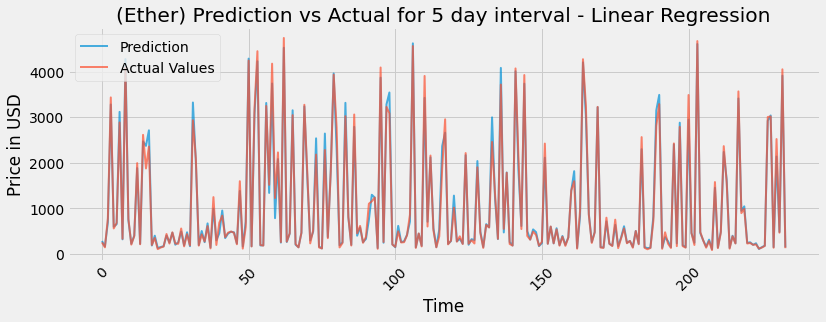

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(linReg_Prediction, label = 'Prediction', lw=2, alpha = .7)
plt.plot(y_test, label = 'Actual Values', lw=2, alpha = .7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y_test, linReg_Prediction))
print(rms)

144.63767031590783


In [ ]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, linReg_Prediction)
print(MAE)

82.99207470638446


In [ ]:
import pickle

In [ ]:
pickle.dump(linReg,open('BNBmodel5Day.pkl','wb'))